**CONECTAR CON GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**REVISAR TIPO DE GPU ASIGNADA**

In [ ]:
!nvidia-smi
!/usr/local/cuda/bin/nvcc --version

Tue Jun 28 21:11:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**MÓDULOS DE TRABAJO**

In [ ]:
import numpy as np # Importar módulo NumPy
import tensorflow as tf #Importar módulo TensorFlow
from tensorflow import keras # Importamos framework Keras
from tensorflow.keras.models import Sequential  # Building Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout # Building Model
from tensorflow.keras.optimizers import Adam  # Optimizador para compilar el modelo
from tensorflow.keras.metrics import categorical_crossentropy  # Métricas para compilar el modelo
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Generador de imágenes
from tensorflow.keras.models import load_model # Para cargar modelos si es necesario / ya se tienen de antes
from sklearn.metrics import confusion_matrix # Matriz de confusión
import itertools #Importamos el módulo itertools
import os #Importamos el módulo OS
import matplotlib.pyplot as plt #Importamos el módulo Matplotlib
%matplotlib inline # Para incluir los plots de matplotlib en el notebook junto al código

**COMPROBACIÓN DE TENSORFLOW CONECTADO A GPU**

In [ ]:
%tensorflow_version 2.x
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


**CARGAR MODELOS (en caso de tenerlos guardados)**

In [ ]:
mD1 = load_model("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/2C/Modelos/D1/2C_model_D1.h5")
mD2 = load_model("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/2C/Modelos/D2/2C_model_D2.h5")
mCNN1 = load_model("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/2C/Modelos/CNN1/2C_model_CNN1.h5")
mCNN2 = load_model("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/2C/Modelos/CNN2/2C_model_CNN2.h5")
mCNN3 = load_model("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/2C/Modelos/CNN3/2C_model_CNN3.h5")
mCNN4 = load_model("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/2C/Modelos/CNN4/2C_model_CNN4.h5")

OSError: ignored

**FUNCIÓN PARA GRAFICAR LA MATRIZ DE CONFUSIÓN**

In [ ]:
# Función para graficar la matriz de confusión:

def plot_confusion_matrix(cm, classes, normalize=False, title="Matriz de Confusión", cmap=plt.cm.Blues):
  # cm: array de matrix de confusión, classes = array con todas las clases
  # Normalize = False --> Sin normalizar
  # cmap: tipo de mapeado de color
  plt.figure(figsize=(8, 6), dpi=80) # Crea una figura de ancho 8 pulgada y 6 pulgadas de alto con una resolución de 80 puntos por pulgada
  plt.imshow(cm, interpolation="nearest", cmap=cmap) # Mostrar en pantalla la matriz de confusión
  plt.title(title) # Título de la figura
  plt.colorbar() # Mostrar barra de color
  tick_marks = np.arange(len(classes)) # Número marcas en los ejes según el número de etiquetas
  plt.xticks(tick_marks, classes, rotation=45) # Definición de etiquetas del eje X y rotación de 45 grados
  plt.yticks(tick_marks, classes) # Definición de etiquetas del eje Y

  if normalize: # En caso de Normalize = True  --> Normalización de los datos
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    print("Matriz de confusión normalizada")
  else: # En caso de Normalize = False
    print("Matriz de confusión sin normalizar")

  print(cm) 

  thresh = cm.max() / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): # Producto cartesiano
    plt.text(j, i, cm[i,j],
             horizontalalignment="center",
             color="white" if cm [i,j] > thresh else "black") 
  plt.tight_layout() # Ajustar el relleno entre y alrededor de los subplots
  plt.ylabel("Observaciones") # Nombre del eje Y
  plt.xlabel("Predicciones") # Nombre del eje X

**PARÁMETROS GENÉRICOS MODELOS**

In [ ]:
e = 10  # Número de Epochs
n = 7 # Exponente de la potencia de 2^n para el tamaño del lote 
bs = 2**n  # Tamaño del lote --> Aumentar si la ejecución de model.fit() va lenta y el tamaño de la muestra es suficientemente grande
ncat = 2 # Número de categorias en las que se desea clasificar
img_h, img_w = (28,28)  # Altura y Anchura en píxeles de las imagenes en el reescalado
nbands = 3  # Numero de bandas de la imagen. En este caso 3 bandas ya que las imágenes son a color (RGB)

**ESTRUCTURAS DE REDES NEURONALES PROPUESTAS**

In [ ]:
mD1 = Sequential([
        Flatten(input_shape=(img_h,img_w,nbands)), # Input layer, número de neuronas definido por la resolución de la imágen que entra
        Dense(units=100, activation="relu"), # Hidden layer con 100 neuronas y una función de activación relu
        Dense(units=100, activation="relu"), # Hidden layer con 100 neuronas y una función de activación relu
        Dense(units=ncat, activation="softmax"), # Output layer con 2 neuronas definidas por el número de categorías y una función de activación softmax
])


# A cambiar, aádir Dropout y quizá cambiar número neuronas en las capas ocultas
mD2 = Sequential([
        Flatten(input_shape=(img_h,img_w,nbands)), # Input layer, número de neuronas definido por la resolución de la imágen que entra
        Dense(units=250, activation="relu"), # Hidden layer con 250 neuronas y una función de activación relu
        Dropout(0.5), # Aplicación de dropout del 50% a la Hidden layer
        Dense(units=250, activation="relu"), # Hidden layer con 250 neuronas y una función de activación relu
        Dropout(0.5), # Aplicación de dropout del 50% a la Hidden layer
        Dense(units=ncat, activation="softmax"), # Output layer con 2 neuronas definidas por el número de categorías y una función de activación softmax
])

mCNN1 = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)), # Convolutional layer con 32 filtros, un núcleo de convolución (3,3), función de activación relu, no padding y número de neuronas igual a la resolución del input
        MaxPool2D(pool_size=(2,2), strides=2), # Pool layer con un núcleo de agrupación de (2,2) y 2 pasos de desplazamiento de la ventanda de agrupación (strides)
        Flatten(), # Flatten layer, pasa de un tensor multidimensional a una dimensión
        Dense(units=ncat, activation="softmax"), # Output layer con 2 neuronas definidas por el número de categorías y una función de activación softmax
])


mCNN2 = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)), # Convolutional layer con 32 filtros, un núcleo de convolución (3,3), función de activación relu, no padding y número de neuronas igual a la resolución del input
        MaxPool2D(pool_size=(2,2), strides=2), # Pool layer con un núcleo de agrupación de (2,2) y 2 pasos de desplazamiento de la ventanda de agrupación (strides)
        Conv2D(filters=64, kernel_size=(3,3), activation="relu",padding="same", input_shape=(img_h,img_w,nbands)), # Convolutional layer con 64 filtros, un núcleo de convolución (3,3), función de activación relu, no padding y número de neuronas igual a la resolución del input
        MaxPool2D(pool_size=(2,2), strides=2), # Pool layer con un núcleo de agrupación de (2,2) y 2 pasos de desplazamiento de la ventanda de agrupación (strides)
        Flatten(), # Flatten layer, pasa de un tensor multidimensional a una dimensión
        Dense(units=ncat, activation="softmax"), # Output layer con 2 neuronas definidas por el número de categorías y una función de activación softmax
])

mCNN3 = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)), # Convolutional layer con 32 filtros, un núcleo de convolución (3,3), función de activación relu, no padding y número de neuronas igual a la resolución del input
        MaxPool2D(pool_size=(2,2), strides=2), # Pool layer con un núcleo de agrupación de (2,2) y 2 pasos de desplazamiento de la ventanda de agrupación (strides)
        Conv2D(filters=64, kernel_size=(3,3), activation="relu",padding="same", input_shape=(img_h,img_w,nbands)), # Convolutional layer con 64 filtros, un núcleo de convolución (3,3), función de activación relu, no padding y número de neuronas igual a la resolución del input
        MaxPool2D(pool_size=(2,2), strides=2), # Pool layer con un núcleo de agrupación de (2,2) y 2 pasos de desplazamiento de la ventanda de agrupación (strides)
        Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)), # Convolutional layer con 128 filtros, un núcleo de convolución (3,3), función de activación relu, no padding y número de neuronas igual a la resolución del input
        MaxPool2D(pool_size=(2,2), strides=2), # Pool layer con un núcleo de agrupación de (2,2) y 2 pasos de desplazamiento de la ventanda de agrupación (strides)
        Flatten(), # Flatten layer, pasa de un tensor multidimensional a una dimensión
        Dense(250, activation="relu"), # Hidden layer con 250 neuronas y una función de activación relu
        Dense(units=ncat, activation="softmax"), # Output layer con 2 neuronas definidas por el número de categorías y una función de activación softmax
])

mCNN4 = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)), # Convolutional layer con 32 filtros, un núcleo de convolución (3,3), función de activación relu, no padding y número de neuronas igual a la resolución del input
        MaxPool2D(pool_size=(2,2), strides=2), # Pool layer con un núcleo de agrupación de (2,2) y 2 pasos de desplazamiento de la ventanda de agrupación (strides)
        Conv2D(filters=64, kernel_size=(3,3), activation="relu",padding="same", input_shape=(img_h,img_w,nbands)), # Convolutional layer con 64 filtros, un núcleo de convolución (3,3), función de activación relu, no padding y número de neuronas igual a la resolución del input
        MaxPool2D(pool_size=(2,2), strides=2), # Pool layer con un núcleo de agrupación de (2,2) y 2 pasos de desplazamiento de la ventanda de agrupación (strides)
        Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)), # Convolutional layer con 128 filtros, un núcleo de convolución (3,3), función de activación relu, no padding y número de neuronas igual a la resolución del input
        MaxPool2D(pool_size=(2,2), strides=2), # Pool layer con un núcleo de agrupación de (2,2) y 2 pasos de desplazamiento de la ventanda de agrupación (strides)
        Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)), # Convolutional layer con 256 filtros, un núcleo de convolución (3,3), función de activación relu, no padding y número de neuronas igual a la resolución del input
        MaxPool2D(pool_size=(2,2), strides=2), # Pool layer con un núcleo de agrupación de (2,2) y 2 pasos de desplazamiento de la ventanda de agrupación (strides)
        Flatten(), # Flatten layer, pasa de un tensor multidimensional a una dimensión
        Dense(250, activation="relu"), # Hidden layer con 250 neuronas y una función de activación relu
        Dense(units=ncat, activation="softmax"), # Output layer con 2 neuronas definidas por el número de categorías y una función de activación softmax
])


In [ ]:
print("MODELO D1")
mD1.summary()  #Resumen de características del modelo D1

print("MODELO D2")
mD2.summary()  #Resumen de características del modelo D2

print("MODELO CNN1")
mCNN1.summary()  #Resumen de características del modelo CNN1

print("MODELO CNN2")
mCNN2.summary()  #Resumen de características del modelo CNN2

print("MODELO CNN3")
mCNN3.summary()  #Resumen de características del modelo CNN3

print("MODELO CNN4")
mCNN4.summary()  #Resumen de características del modelo CNN4


In [ ]:
mD1.compile(
    optimizer = "Adam",  # Optimizador más común
    loss = "binary_crossentropy",  # Función de pérdida, específica para casos de categorización binaria
    metrics = ["accuracy"]  # Accuracy 
)

mD2.compile(
    optimizer = "Adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

mCNN1.compile(
    optimizer = "Adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

mCNN2.compile(
    optimizer = "Adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

mCNN3.compile(
    optimizer = "Adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

mCNN4.compile(
    optimizer = "Adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

**PREPROCESO DE IMAGENES**

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) # Función de pretratamiento de RN VGG16. Cambia a BGR y aplica un normalización zero-centered
valid_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) 

**FUNCIÓN DE COMPROBACIÓN DE IMÁGENES DESPUÉS DE PRETRATAMIENTO+GENERADOR**

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20)) # Definir tamaño y distribución de los subplots
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes): # Asignar cada imagen a un subplot
    ax.imshow(img) # Mostra imagen en pantalla
    ax.axis("off") # Sin nombre de ejes
  plt.tight_layout() # Ajustar el relleno entre y alrededor de los subplots
  plt.show() # Mostrar

## **2-FOLD CROSSVALIDATION METHOD**

---



---



### **TRAIN = SPLIT_0 // VALIDATION/TEST = SPLIT_1**

**PARÁMETROS ESPECÍFICOS DEL MODELO 0-1**

In [ ]:
train_path_0 = "/content/drive/MyDrive/Capstone_Project/Datos/labelled_images/2-fold/2C/Split_0" # Ruta a imágenes del train dataset Split 0
valid_path_1 = "/content/drive/MyDrive/Capstone_Project/Datos/labelled_images/2-fold/2C/Split_1" # Ruta a imágenes del validation set Split 1

train_size_0 = 23621 # Medida del train dataset
valid_size_1 = 23617 # Medida del validation dataset

**GENERADOR DE IMÁGENES**

In [ ]:
train_generator_0 = train_datagen.flow_from_directory(train_path_0, target_size=(img_h,img_w), classes=["Normal", "Anomalia"], batch_size=bs) # Generador de imágenes para train, selecciona fotos del directorio especificado en función del nombre de la carpeta (class) y define el tamaño de lote a introducir en el modelo. El orden del output es aleatorio
valid_generator_1 = valid_datagen.flow_from_directory(directory=valid_path_1, target_size=(img_h,img_w), classes=["Normal", "Anomalia"], batch_size=bs) # Generador de imágenes para validation, selecciona fotos del directorio especificado en función del nombre de la carpeta (class) y define el tamaño de lote a introducir en el modelo. El output tiene las imágenes en orden 
test_generator_1 = valid_datagen.flow_from_directory(directory=valid_path_1, target_size=(img_h,img_w), classes=["Normal", "Anomalia"], batch_size=bs, shuffle=False) # Generador de imágenes para test, selecciona fotos del directorio especificado en función del nombre de la carpeta (class) y define el tamaño de lote a introducir en el modelo. El output tiene las imágenes en orden 

Found 23621 images belonging to 2 classes.
Found 23617 images belonging to 2 classes.
Found 23617 images belonging to 2 classes.


In [ ]:
assert train_generator_0.n == train_size_0
assert valid_generator_1.n == valid_size_1
assert test_generator_1.n == valid_size_1
assert train_generator_0.num_classes == valid_generator_1.num_classes == ncat

**REVISAR IMAGENES PARA VER RESULTADO DE PRETRATAMIENTO + GENERADOR**

In [ ]:
imgs, labels = next(train_generator_0)

In [ ]:
plotImages(imgs)
print(labels)

**ENTRENAMIENTO DE MODELOS 0-1**

In [ ]:
# Train = Split_0 y Validation = Split_1

print("MODELO 2C D1")
HistD1_0_1 = mD1.fit( # Entrenamiento del modelo D1
    train_generator_0, # Train dataset
    validation_data = valid_generator_1, # Validation dataset
    epochs = 10, # Número de espochs
)

print("MODELO 2C D2")
HistD2_0_1 = mD2.fit( # Entrenamiento del modelo D2
    train_generator_0, 
    validation_data = valid_generator_1,
    epochs = 10,
)

print("MODELO 2C CNN1")
HistCNN1_0_1 = mCNN1.fit( # Entrenamiento del modelo CNN1
    train_generator_0, 
    validation_data = valid_generator_1,
    epochs = 10,
)

print("MODELO 2C CNN2")
HistCNN2_0_1 = mCNN2.fit( # Entrenamiento del modelo CNN2
    train_generator_0, 
    validation_data = valid_generator_1,
    epochs = 10,
)

print("MODELO 2C CNN3")
HistCNN3_0_1 = mCNN3.fit( # Entrenamiento del modelo CNN3
    train_generator_0, 
    validation_data = valid_generator_1,
    epochs = 10,
)

print("MODELO 2C CNN4")
HistCNN4_0_1 = mCNN4.fit( # Entrenamiento del modelo CNN4
    train_generator_0, 
    validation_data = valid_generator_1,
    epochs = 10,
)

MODELO 2C D1
Epoch 1/10
185/185 [==============================] - 133s 719ms/step - loss: 0.1794 - accuracy: 0.9419 - val_loss: 0.2006 - val_accuracy: 0.9338
Epoch 2/10
185/185 [==============================] - 133s 721ms/step - loss: 0.1835 - accuracy: 0.9403 - val_loss: 0.2245 - val_accuracy: 0.9361
Epoch 3/10
185/185 [==============================] - 132s 714ms/step - loss: 0.1752 - accuracy: 0.9431 - val_loss: 0.2057 - val_accuracy: 0.9383
Epoch 4/10
185/185 [==============================] - 132s 716ms/step - loss: 0.1705 - accuracy: 0.9460 - val_loss: 0.2185 - val_accuracy: 0.9334
Epoch 5/10
185/185 [==============================] - 133s 720ms/step - loss: 0.1740 - accuracy: 0.9434 - val_loss: 0.2098 - val_accuracy: 0.9369
Epoch 6/10
185/185 [==============================] - 134s 725ms/step - loss: 0.1643 - accuracy: 0.9453 - val_loss: 0.2323 - val_accuracy: 0.9358
Epoch 7/10
185/185 [==============================] - 139s 751ms/step - loss: 0.1816 - accuracy: 0.9412 - val_l

In [ ]:
val_acc_D1_0_1 = list(HistD1_0_1.history["val_accuracy"])
max_val_acc_D1_0_1 = max(val_acc_D1_0_1)

val_acc_D2_0_1 = list(HistD2_0_1.history["val_accuracy"])
max_val_acc_D2_0_1 = max(val_acc_D1_0_1)

val_acc_CNN1_0_1 = list(HistCNN1_0_1.history["val_accuracy"])
max_val_acc_CNN1_0_1 = max(val_acc_CNN1_0_1)

val_acc_CNN2_0_1 = list(HistCNN2_0_1.history["val_accuracy"])
max_val_acc_CNN2_0_1 = max(val_acc_CNN2_0_1)

val_acc_CNN3_0_1 = list(HistCNN3_0_1.history["val_accuracy"])
max_val_acc_CNN3_0_1 = max(val_acc_CNN3_0_1)

val_acc_CNN4_0_1 = list(HistCNN4_0_1.history["val_accuracy"])
max_val_acc_CNN4_0_1 = max(val_acc_CNN4_0_1)

max_acc_0_1 = [max_val_acc_D1_0_1, max_val_acc_D2_0_1, max_val_acc_CNN1_0_1, max_val_acc_CNN2_0_1, max_val_acc_CNN3_0_1, max_val_acc_CNN4_0_1]

**PREDICCIÓN MODELO 0-1**

In [ ]:
print("MODELO 2C D1")
Pred_mD1_0_1 = mD1.predict(test_generator_1, verbose=1) # Predicciones del modelo D1

print("MODELO 2C D2")
Pred_mD2_0_1 = mD2.predict(test_generator_1, verbose=1) # Predicciones del modelo D2

print("MODELO 2C CNN1")
Pred_mCNN1_0_1 = mCNN1.predict(test_generator_1, verbose=1) # Predicciones del modelo CNN1

print("MODELO 2C CNN2")
Pred_mCNN2_0_1 = mCNN2.predict(test_generator_1, verbose=1) # Predicciones del modelo CNN2

print("MODELO 2C CNN3")
Pred_mCNN3_0_1 = mCNN3.predict(test_generator_1, verbose=1) # Predicciones del modelo CNN3

print("MODELO 2C CNN4")
Pred_mCNN4_0_1 = mCNN4.predict(test_generator_1, verbose=1) # Predicciones del modelo CNN4

MODELO 2C D1
185/185 [==============================] - 66s 359ms/step
MODELO 2C D2
185/185 [==============================] - 68s 366ms/step
MODELO 2C CNN1
185/185 [==============================] - 67s 361ms/step
MODELO 2C CNN2
185/185 [==============================] - 67s 360ms/step
MODELO 2C CNN3
185/185 [==============================] - 67s 361ms/step
MODELO 2C CNN4
185/185 [==============================] - 67s 363ms/step


**MATRICES DE CONFUSIÓN**

In [ ]:
# Cálculo de las matrices de confusión para cada una de las estructuras que se han modelado:

# Matriz de confusión para el modelo D1:
cm_D1_0_1 = confusion_matrix(y_true=test_generator_1.classes, y_pred=np.argmax(Pred_mD1_0_1, axis=-1)) 

# Matriz de confusión para el modelo D2:
cm_D2_0_1 = confusion_matrix(y_true=test_generator_1.classes, y_pred=np.argmax(Pred_mD2_0_1, axis=-1))

# Matriz de confusión para el modelo CNN1:
cm_CNN1_0_1 = confusion_matrix(y_true=test_generator_1.classes, y_pred=np.argmax(Pred_mCNN1_0_1, axis=-1))

# Matriz de confusión para el modelo CNN2:
cm_CNN2_0_1 = confusion_matrix(y_true=test_generator_1.classes, y_pred=np.argmax(Pred_mCNN2_0_1, axis=-1))

# Matriz de confusión para el modelo CNN3:
cm_CNN3_0_1 = confusion_matrix(y_true=test_generator_1.classes, y_pred=np.argmax(Pred_mCNN3_0_1, axis=-1))

# Matriz de confusión para el modelo CNN4:
cm_CNN4_0_1 = confusion_matrix(y_true=test_generator_1.classes, y_pred=np.argmax(Pred_mCNN4_0_1, axis=-1))

In [ ]:
test_generator_1.class_indices

{'Anomalia': 1, 'Normal': 0}

Matriz de confusión sin normalizar
[[21340   147]
 [ 1424   710]]


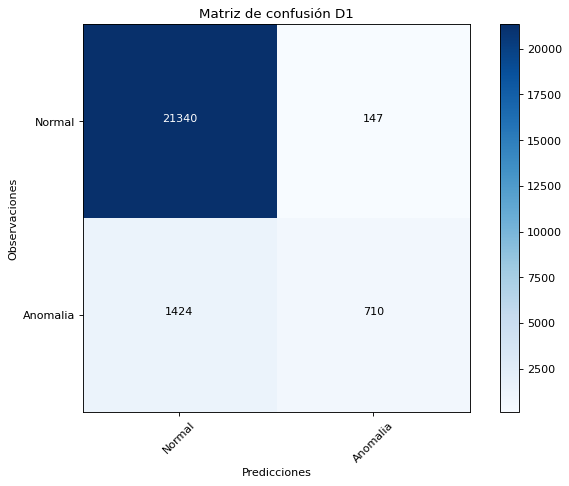

In [ ]:
# Graficar matrices de confusión

cm_plot_labels = ["Normal","Anomalia"]
plot_confusion_matrix(cm=cm_D1_0_1,classes=cm_plot_labels,title="Matriz de confusión D1")

Matriz de confusión sin normalizar
[[21487     0]
 [ 2134     0]]


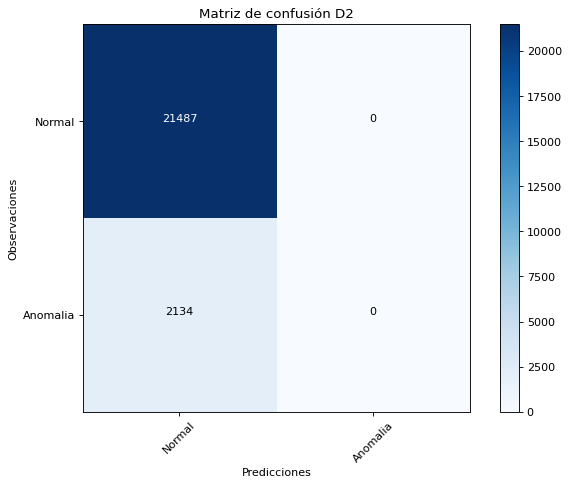

In [ ]:
plot_confusion_matrix(cm=cm_D2_0_1,classes=cm_plot_labels,title="Matriz de confusión D2")

Matriz de confusión sin normalizar
[[21084   403]
 [  923  1211]]


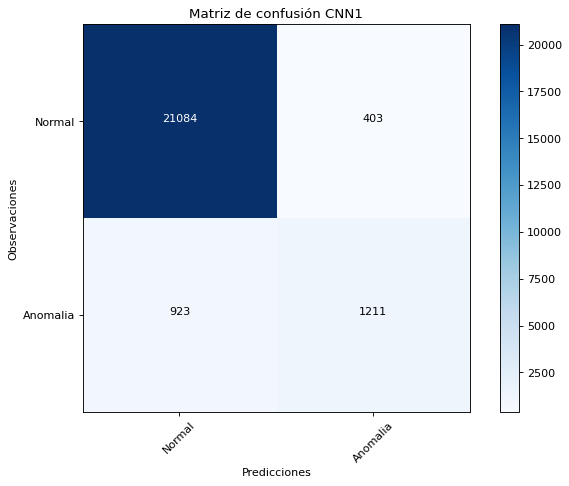

In [ ]:
plot_confusion_matrix(cm=cm_CNN1_0_1,classes=cm_plot_labels,title="Matriz de confusión CNN1")

Matriz de confusión sin normalizar
[[21248   239]
 [  720  1414]]


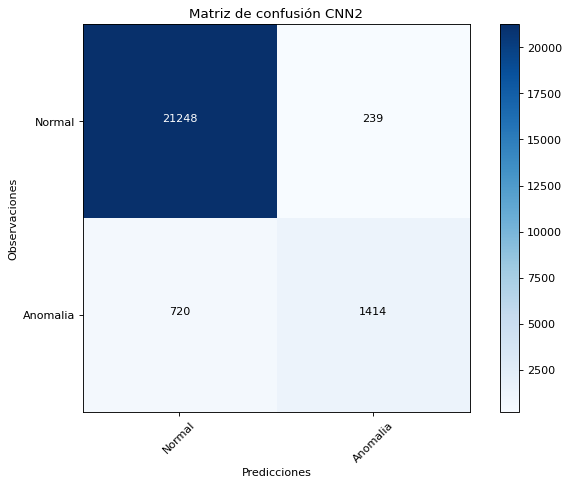

In [ ]:
plot_confusion_matrix(cm=cm_CNN2_0_1,classes=cm_plot_labels,title="Matriz de confusión CNN2")

Matriz de confusión sin normalizar
[[21399    88]
 [  598  1536]]


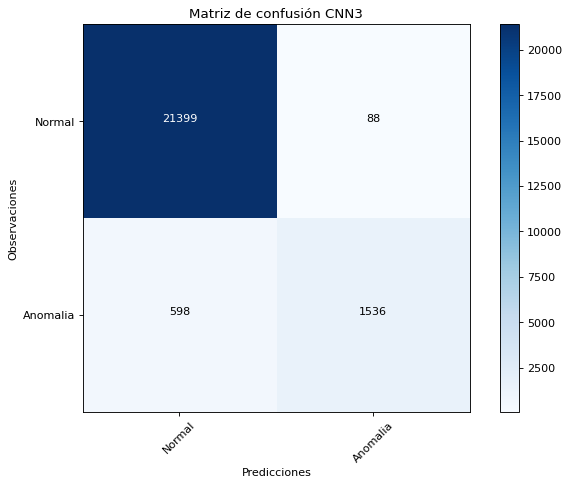

In [ ]:
plot_confusion_matrix(cm=cm_CNN3_0_1,classes=cm_plot_labels,title="Matriz de confusión CNN3")

Matriz de confusión sin normalizar
[[21363   124]
 [  502  1632]]


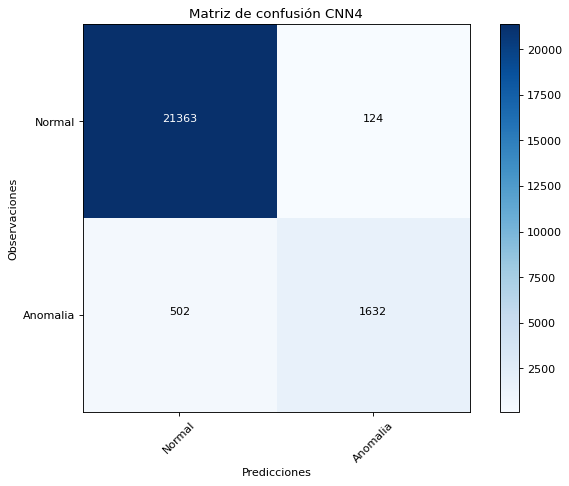

In [ ]:
plot_confusion_matrix(cm=cm_CNN4_0_1,classes=cm_plot_labels,title="Matriz de confusión CNN4")

### **TRAIN = SPLIT_1 // VALIDATION/TEST = SPLIT_0**

In [ ]:
train_path_1 = "/content/drive/MyDrive/Capstone_Project/Datos/labelled_images/2-fold/2C/Split_1" # Ruta a imágenes del validation set Split 1
valid_path_0 = "/content/drive/MyDrive/Capstone_Project/Datos/labelled_images/2-fold/2C/Split_0" # Ruta a imágenes del validation set Split 0

train_size_1 = 23617 # Medida del train dataset
valid_size_0 = 23621 # Medida del validation dataset

In [ ]:
train_generator_1 = train_datagen.flow_from_directory(train_path_1, target_size=(img_h,img_w), classes=["Normal", "Anomalia"], batch_size=bs) # Generador de imágenes para train, selecciona fotos del directorio especificado en función del nombre de la carpeta (class) y define el tamaño de lote a introducir en el modelo. El orden del output es aleatorio
valid_generator_0 = valid_datagen.flow_from_directory(directory=valid_path_0, target_size=(img_h,img_w), classes=["Normal", "Anomalia"], batch_size=bs) # Generador de imágenes para validation, selecciona fotos del directorio especificado en función del nombre de la carpeta (class) y define el tamaño de lote a introducir en el modelo. El output tiene las imágenes en orden 
test_generator_0 = valid_datagen.flow_from_directory(directory=valid_path_0, target_size=(img_h,img_w), classes=["Normal", "Anomalia"], batch_size=bs, shuffle=False) # Generador de imágenes para test, selecciona fotos del directorio especificado en función del nombre de la carpeta (class) y define el tamaño de lote a introducir en el modelo. El output tiene las imágenes en orden 

Found 23617 images belonging to 2 classes.
Found 23621 images belonging to 2 classes.
Found 23621 images belonging to 2 classes.


In [ ]:
# Lo mismo que en el caso de Train = Split_0 y Validation = Split_1, pero a la inversa

print("MODELO 2C D1")
HistD1_1_0 = mD1.fit(
    train_generator_1, 
    validation_data = valid_generator_0,
    epochs = 10,
)

print("MODELO 2C D2")
HistD2_1_0 = mD2.fit(
    train_generator_1, 
    validation_data = valid_generator_0,
    epochs = 10,
)

print("MODELO 2C CNN1")
HistCNN1_1_0 = mCNN1.fit(
    train_generator_1, 
    validation_data = valid_generator_0,
    epochs = 10,
)

print("MODELO 2C CNN2")
HistCNN2_1_0 = mCNN2.fit(
    train_generator_1, 
    validation_data = valid_generator_0,
    epochs = 10,
)

print("MODELO 2C CNN3")
HistCNN3_1_0 = mCNN3.fit(
    train_generator_1, 
    validation_data = valid_generator_0,
    epochs = 10,
)

print("MODELO 2C CNN4")
HistCNN4_1_0 = mCNN4.fit(
    train_generator_1, 
    validation_data = valid_generator_0,
    epochs = 10,
)

MODELO 2C D1
Epoch 1/10
185/185 [==============================] - 3580s 19s/step - loss: 0.4819 - accuracy: 0.9054 - val_loss: 0.3292 - val_accuracy: 0.9161
Epoch 2/10
185/185 [==============================] - 133s 722ms/step - loss: 0.3564 - accuracy: 0.9116 - val_loss: 0.2894 - val_accuracy: 0.9197
Epoch 3/10
185/185 [==============================] - 132s 714ms/step - loss: 0.2929 - accuracy: 0.9197 - val_loss: 0.2580 - val_accuracy: 0.9255
Epoch 4/10
185/185 [==============================] - 132s 717ms/step - loss: 0.2394 - accuracy: 0.9281 - val_loss: 0.2456 - val_accuracy: 0.9251
Epoch 5/10
185/185 [==============================] - 132s 714ms/step - loss: 0.2387 - accuracy: 0.9284 - val_loss: 0.2310 - val_accuracy: 0.9312
Epoch 6/10
185/185 [==============================] - 132s 718ms/step - loss: 0.2266 - accuracy: 0.9312 - val_loss: 0.2228 - val_accuracy: 0.9297
Epoch 7/10
185/185 [==============================] - 132s 715ms/step - loss: 0.2140 - accuracy: 0.9347 - val_lo

In [ ]:
val_acc_D1_1_0 = list(HistD1_1_0.history["val_accuracy"])
max_val_acc_D1_1_0 = max(val_acc_D1_1_0)

val_acc_D2_1_0 = list(HistD2_1_0.history["val_accuracy"])
max_val_acc_D2_1_0 = max(val_acc_D1_1_0)

val_acc_CNN1_1_0 = list(HistCNN1_1_0.history["val_accuracy"])
max_val_acc_CNN1_1_0 = max(val_acc_CNN1_1_0)

val_acc_CNN2_1_0 = list(HistCNN2_1_0.history["val_accuracy"])
max_val_acc_CNN2_1_0 = max(val_acc_CNN2_1_0)

val_acc_CNN3_1_0 = list(HistCNN3_1_0.history["val_accuracy"])
max_val_acc_CNN3_1_0 = max(val_acc_CNN3_1_0)

val_acc_CNN4_1_0 = list(HistCNN4_1_0.history["val_accuracy"])
max_val_acc_CNN4_1_0 = max(val_acc_CNN4_1_0)

max_acc_1_0 = [max_val_acc_D1_1_0, max_val_acc_D2_1_0, max_val_acc_CNN1_1_0, max_val_acc_CNN2_1_0, max_val_acc_CNN3_1_0, max_val_acc_CNN4_1_0]

**PREDICCIÓN MODELO 1-0**

In [ ]:
# Lo mismo que en el caso de Train = Split_0 y Validation = Split_1, pero a la inversa

print("MODELO 2C D1")
Pred_mD1_1_0 = mD1.predict(test_generator_0, verbose=1)

print("MODELO 2C D2")
Pred_mD2_1_0 = mD2.predict(test_generator_0, verbose=1)

print("MODELO 2C CNN1")
Pred_mCNN1_1_0 = mCNN1.predict(test_generator_0, verbose=1)

print("MODELO 2C CNN2")
Pred_mCNN2_1_0 = mCNN2.predict(test_generator_0, verbose=1)

print("MODELO 2C CNN3")
Pred_mCNN3_1_0 = mCNN3.predict(test_generator_0, verbose=1)

print("MODELO 2C CNN4")
Pred_mCNN4_1_0 = mCNN4.predict(test_generator_0, verbose=1)

MODELO 2C D1
185/185 [==============================] - 77s 415ms/step
MODELO 2C D2
185/185 [==============================] - 66s 359ms/step
MODELO 2C CNN1
185/185 [==============================] - 66s 358ms/step
MODELO 2C CNN2
185/185 [==============================] - 67s 363ms/step
MODELO 2C CNN3
185/185 [==============================] - 67s 364ms/step
MODELO 2C CNN4
185/185 [==============================] - 67s 360ms/step


**MATRICES DE CONFUSIÓN**

In [ ]:
# Cálculo de las matrices de confusión para cada una de las estructuras que se han modelado:

# Matriz de confusión para el modelo D1:
cm_D1_1_0 = confusion_matrix(y_true=test_generator_1.classes, y_pred=np.argmax(Pred_mD1_1_0, axis=-1)) 

# Matriz de confusión para el modelo D2:
cm_D2_1_0 = confusion_matrix(y_true=test_generator_1.classes, y_pred=np.argmax(Pred_mD2_1_0, axis=-1))

# Matriz de confusión para el modelo CNN1:
cm_CNN1_1_0 = confusion_matrix(y_true=test_generator_1.classes, y_pred=np.argmax(Pred_mCNN1_1_0, axis=-1))

# Matriz de confusión para el modelo CNN2:
cm_CNN2_1_0 = confusion_matrix(y_true=test_generator_1.classes, y_pred=np.argmax(Pred_mCNN2_1_0, axis=-1))

# Matriz de confusión para el modelo CNN3:
cm_CNN3_1_0 = confusion_matrix(y_true=test_generator_1.classes, y_pred=np.argmax(Pred_mCNN3_1_0, axis=-1))

# Matriz de confusión para el modelo CNN4:
cm_CNN4_1_0 = confusion_matrix(y_true=test_generator_1.classes, y_pred=np.argmax(Pred_mCNN4_1_0, axis=-1))

In [ ]:
test_generator_1.class_indices

{'Anomalia': 1, 'Normal': 0}

Matriz de confusión sin normalizar
[[21340   147]
 [ 1424   710]]


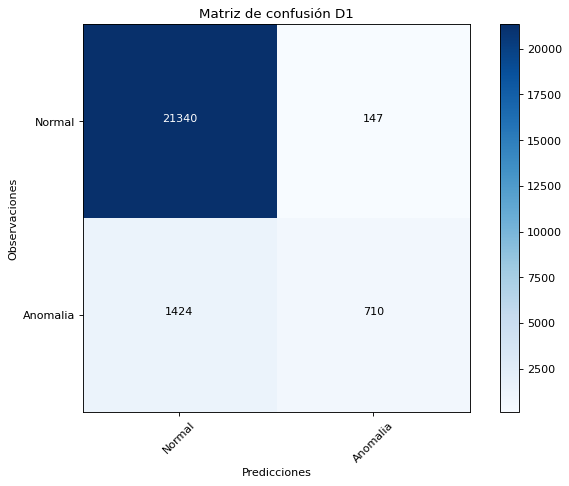

In [ ]:
# Graficar matrices de confusión
cm_plot_labels = ["Normal","Anomalia"]
plot_confusion_matrix(cm=cm_D1_1_0,classes=cm_plot_labels,title="Matriz de confusión D1")

Matriz de confusión sin normalizar
[[21487     0]
 [ 2134     0]]


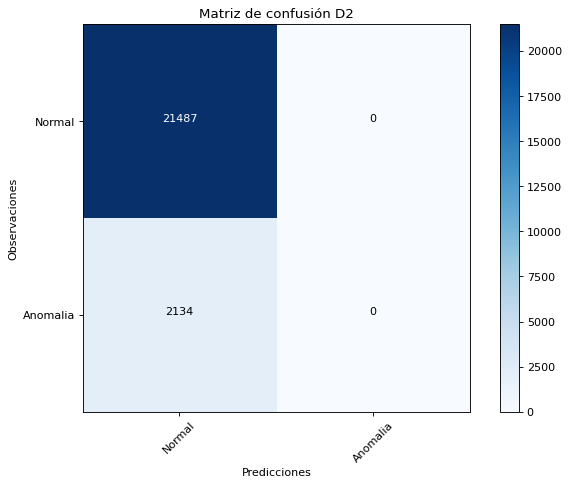

In [ ]:
plot_confusion_matrix(cm=cm_D2_1_0,classes=cm_plot_labels,title="Matriz de confusión D2")

Matriz de confusión sin normalizar
[[21084   403]
 [  923  1211]]


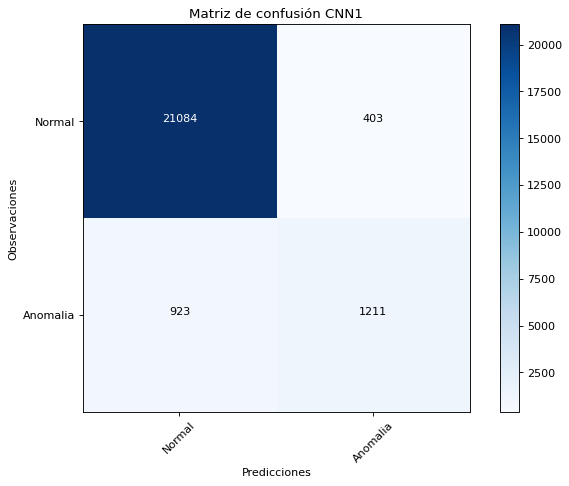

In [ ]:
plot_confusion_matrix(cm=cm_CNN1_1_0,classes=cm_plot_labels,title="Matriz de confusión CNN1")

Matriz de confusión sin normalizar
[[21248   239]
 [  720  1414]]


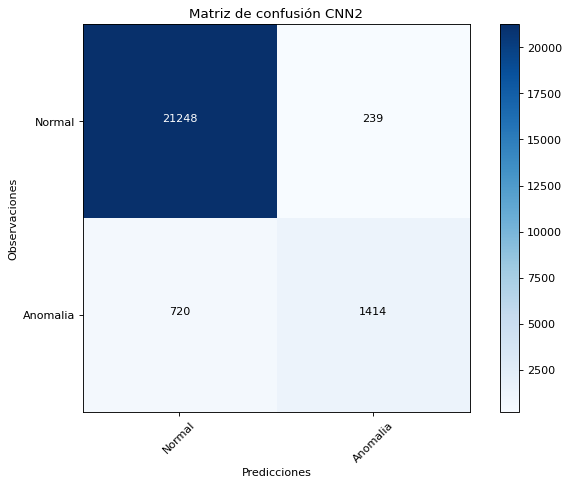

In [ ]:
plot_confusion_matrix(cm=cm_CNN2_1_0,classes=cm_plot_labels,title="Matriz de confusión CNN2")

Matriz de confusión sin normalizar
[[21399    88]
 [  598  1536]]


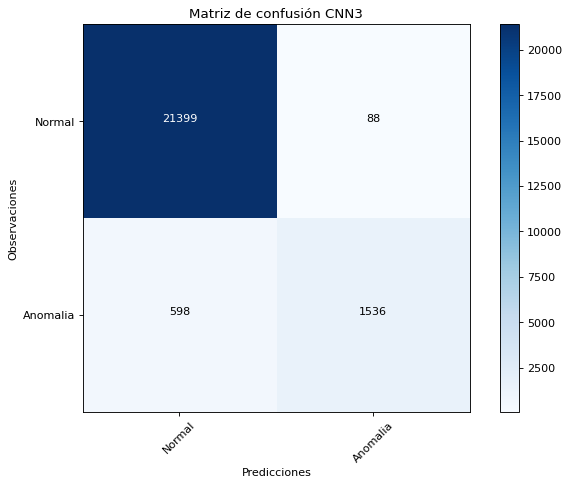

In [ ]:
plot_confusion_matrix(cm=cm_CNN3_1_0,classes=cm_plot_labels,title="Matriz de confusión CNN3")

Matriz de confusión sin normalizar
[[21363   124]
 [  502  1632]]


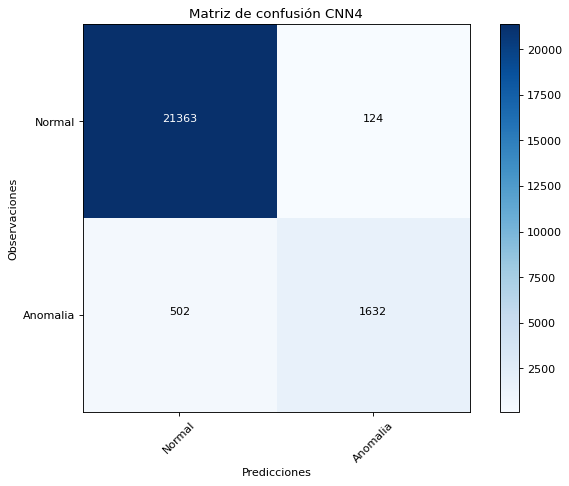

In [ ]:
plot_confusion_matrix(cm=cm_CNN4_1_0,classes=cm_plot_labels,title="Matriz de confusión CNN4")

## **MEDIA DE LOS RESULTADOS DEL 2-FOLD**

**MEDIA DE LAS MATRICES DE CONFUSIÓN**

In [ ]:
# Cálculo de las matrices de confusión para cada una de las estructuras que se han modelado:

# Matriz de confusión para el modelo D1:
cm_D1_m = ((cm_D1_0_1 + cm_D1_1_0) / 2).astype(int)

# Matriz de confusión para el modelo D2:
cm_D2_m = ((cm_D2_0_1 + cm_D2_1_0) / 2).astype(int)

# Matriz de confusión para el modelo CNN1:
cm_CNN1_m = ((cm_CNN1_0_1 + cm_CNN1_1_0) / 2).astype(int)

# Matriz de confusión para el modelo CNN2:
cm_CNN2_m = ((cm_CNN2_0_1 + cm_CNN2_1_0) / 2).astype(int)

# Matriz de confusión para el modelo CNN3:
cm_CNN3_m = ((cm_CNN3_0_1 + cm_CNN3_1_0) / 2).astype(int)

# Matriz de confusión para el modelo CNN4:
cm_CNN4_m = ((cm_CNN3_0_1 + cm_CNN3_1_0) / 2).astype(int)

Matriz de confusión sin normalizar
[[21340   147]
 [ 1424   710]]


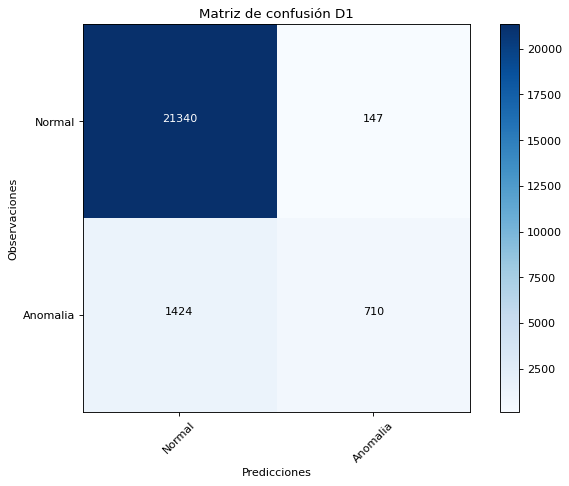

In [ ]:
plot_confusion_matrix(cm=cm_D1_m,classes=cm_plot_labels,title="Matriz de confusión D1")

Matriz de confusión sin normalizar
[[21487     0]
 [ 2134     0]]


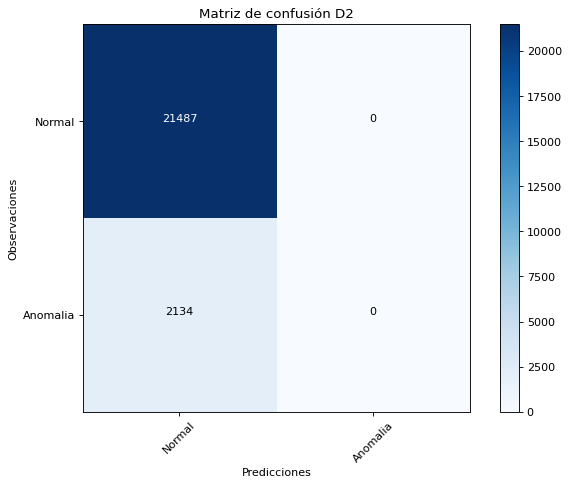

In [ ]:
plot_confusion_matrix(cm=cm_D2_m,classes=cm_plot_labels,title="Matriz de confusión D2")

Matriz de confusión sin normalizar
[[21084   403]
 [  923  1211]]


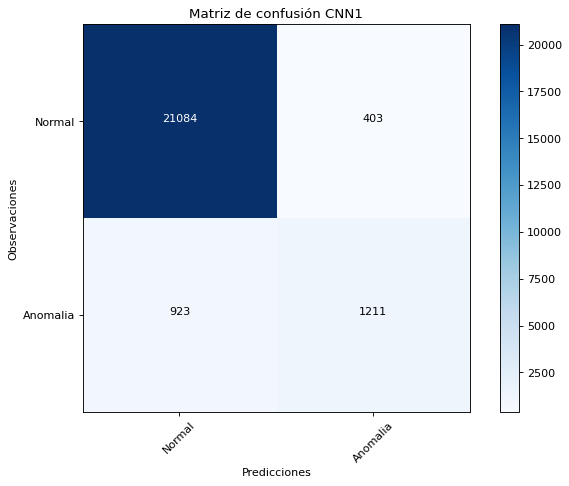

In [ ]:
plot_confusion_matrix(cm=cm_CNN1_m,classes=cm_plot_labels,title="Matriz de confusión CNN1")

Matriz de confusión sin normalizar
[[21248   239]
 [  720  1414]]


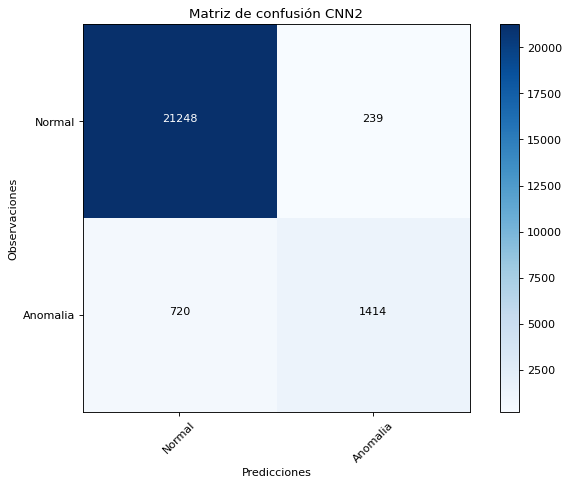

In [ ]:
plot_confusion_matrix(cm=cm_CNN2_m,classes=cm_plot_labels,title="Matriz de confusión CNN2")

Matriz de confusión sin normalizar
[[21399    88]
 [  598  1536]]


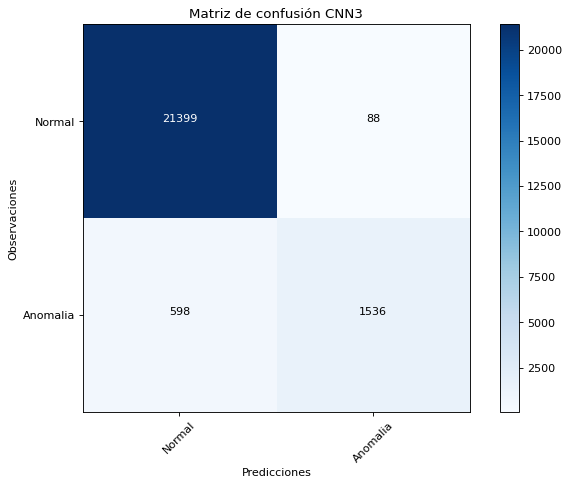

In [ ]:
plot_confusion_matrix(cm=cm_CNN3_m,classes=cm_plot_labels,title="Matriz de confusión CNN3")

Matriz de confusión sin normalizar
[[21399    88]
 [  598  1536]]


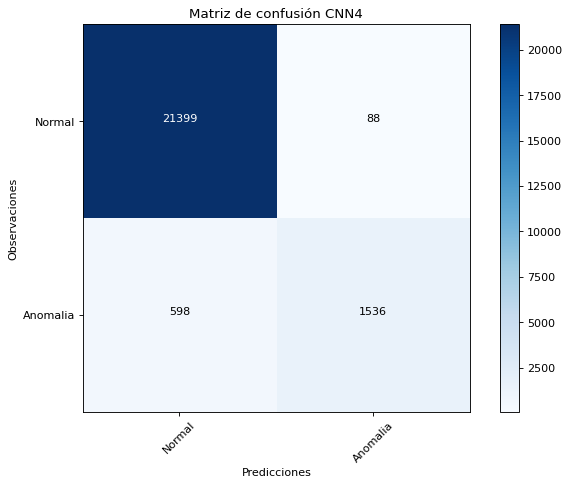

In [ ]:
plot_confusion_matrix(cm=cm_CNN4_m,classes=cm_plot_labels,title="Matriz de confusión CNN4")

**GUARDAR LOS MODELOS**

In [ ]:
## GUARDAR EL MODELO COMPLETO: PARAMETROS, PESOS, ETC

mD1.save("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/2C/Modelos/D1/2C_model_D1.h5")
mD2.save("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/2C/Modelos/D2/2C_model_D2.h5")
mCNN1.save("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/2C/Modelos/CNN1/2C_model_CNN1.h5")
mCNN2.save("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/2C/Modelos/CNN2/2C_model_CNN2.h5")
mCNN3.save("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/2C/Modelos/CNN3/2C_model_CNN3.h5")
mCNN4.save("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/2C/Modelos/CNN4/2C_model_CNN4.h5")